In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

C:\Users\Komati Satya\AppData\Local\Temp\ipykernel_2620\1958805592.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df=pd.read_csv("Csv files/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


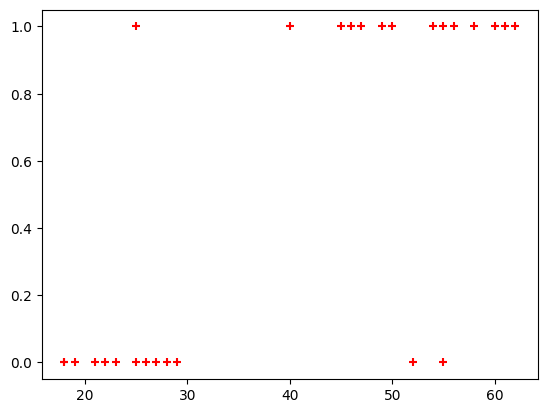

In [4]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test=train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [7]:
X_test

,age
15,55
11,28
0,22
6,55
7,60
22,40


In [9]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [10]:
model.fit(X_train,y_train)

LogisticRegression()

In [11]:
X_test

,age
15,55
11,28
0,22
6,55
7,60
22,40


In [12]:
y_predicted=model.predict(X_test)

In [13]:
model.score(X_test,y_test)

0.8333333333333334

In [15]:
model.predict_proba(X_test)

array([[0.05646111, 0.94353889],
       [0.80615976, 0.19384024],
       [0.91433605, 0.08566395],
       [0.05646111, 0.94353889],
       [0.02655773, 0.97344227],
       [0.38703581, 0.61296419]])

In [16]:
y_predicted

array([1, 0, 0, 1, 1, 1], dtype=int64)

In [17]:
model.coef_

array([[0.15708641]])

In [18]:
model.intercept_

array([-5.82366714])

In [31]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [32]:
def prediction_function(age):
    z = 0.042 * age- 1.53
    y = sigmoid(z)
    return y

In [33]:
age = 35
prediction_function(age)

0.4850044983805899

In [34]:
age = 43
prediction_function(age)

0.568565299077705

In [38]:
#Multiclass classification

from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits=load_digits()

<Figure size 640x480 with 0 Axes>

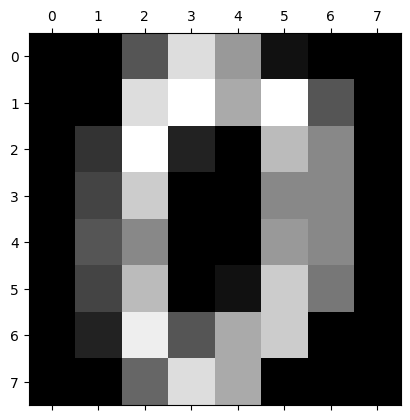

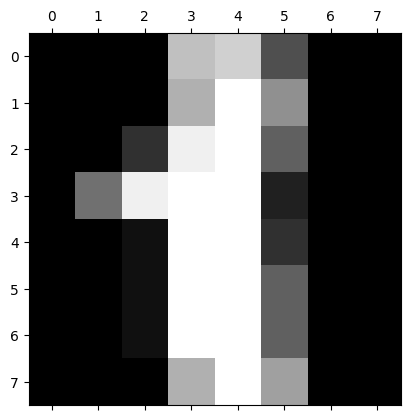

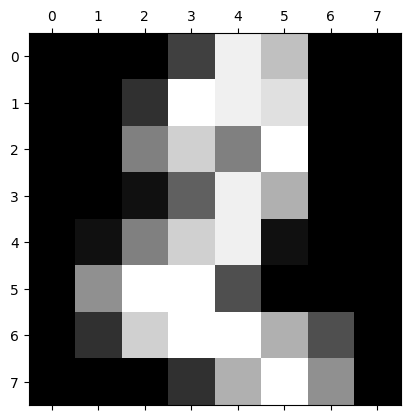

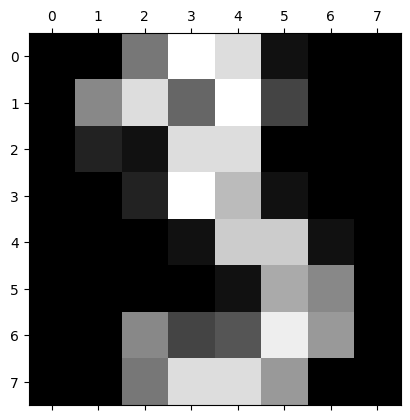

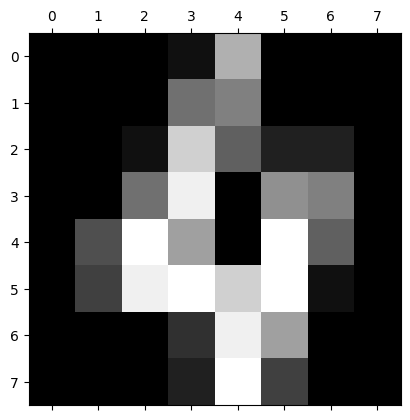

In [40]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [41]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [42]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [43]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [44]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [48]:
model.fit(X_train,y_train)

C:\Users\Komati Satya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
model.score(X_test,y_test)

0.9583333333333334

In [52]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [53]:
y_pred=model.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  1, 40,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 28,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  1, 31,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  0, 34]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

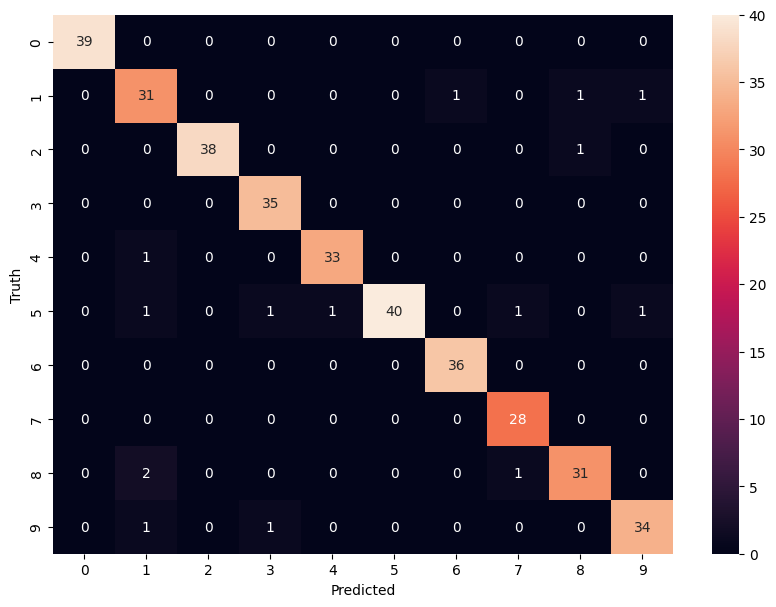

In [56]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')